In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
from itertools import product
import sys,os
import time

import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append(os.path.abspath("/home/olya/SFU/Breast_cancer/DESMOND/"))

from find_optimal_parameters import *
%matplotlib inline

In [2]:
# and prefix of input file name
fname_prefix = "simulated.N=10.Mu=2.0.GxP="
# suffix idication overlap type
overlap = "TT"
# where are output files
out_dir = "../simulated_datasets/results/"

# sizes of biclusters
g_sizes = [5,10,20,50,100]
s_sizes = [10,20,50,100]

# true biclusters 
true_bic_dir = "../simulated_datasets/true_biclusters/"
true_bic_fname_prefix = fname_prefix
true_bic_fname_suffix = ".overlap="+overlap+".biclusters.txt"

In [3]:
# predicted biclusters 
tool_name = "xMOTIFs"
tool_suffix = "XMotifs"
n_runs = 10

parameters = (("discr_levels",[2, 3, 5, 10, 15, 20, 30, 40, 50]),
              ("alpha",[0.001,0.01,0.05,0.10,0.15]),
              ("ns",[5,10,25,50,100]))

pred_bic_dir =  out_dir+tool_name+"/"
pred_bic_fname_prefix = fname_prefix
pred_bic_fname_suffix = ".overlap="+overlap+"."+tool_suffix+".biclust_results.txt"

img_outdir = out_dir + "/J/img"
tsv_outdir = out_dir + "/J/"

In [5]:

true_bic_fname = true_bic_fname_prefix+str(20)+","+str(100)+true_bic_fname_suffix 
true_bics = read_true_bics(true_bic_dir+true_bic_fname)

bic_file_path = '../simulated_datasets/results/xMOTIFs/discr_levels=5.alpha=0.15.ns=100/simulated.N=10.Mu=2.0.GxP=20,100.overlap=TT.XMotifs.biclust_results.txt'
runs = parse_biclust(bic_file_path,n_runs=n_runs)
for i in range(0,n_runs):
    pred_bics = runs[i] 
    print(i, np.mean(F1_per_bic(true_bics, pred_bics)) )
    

0 0.2414971816675077
1 0.24891199379417261
2 0.241858895643639
3 0.24408247956761436
4 0.23258839324659641
5 0.24422341388299315
6 0.24767250118342687
7 0.24420617248809134
8 0.24997085152323054
9 0.23867410342790746


In [6]:
results= read_all_results(parameters,tool_name,n_runs=n_runs,
                          pred_bic_dir=pred_bic_dir,
                          pred_bic_fname_prefix=fname_prefix,
                          pred_bic_fname_suffix=pred_bic_fname_suffix,
                          true_bic_dir=true_bic_dir,
                          true_bic_fname_prefix=fname_prefix,
                          true_bic_fname_suffix=true_bic_fname_suffix)

results_outfile =  tsv_outdir+ tool_suffix+".results.tsv"
results.to_csv(results_outfile ,sep="\t")

File not found ../simulated_datasets/results/xMOTIFs/discr_levels=2.alpha=0.05.ns=5/simulated.N=10.Mu=2.0.GxP=5,10.overlap=TT.XMotifs.biclust_results.txt
Failed to parse ../simulated_datasets/results/xMOTIFs/discr_levels=2.alpha=0.05.ns=5/simulated.N=10.Mu=2.0.GxP=5,10.overlap=TT.XMotifs.biclust_results.txt
File not found ../simulated_datasets/results/xMOTIFs/discr_levels=2.alpha=0.05.ns=5/simulated.N=10.Mu=2.0.GxP=5,20.overlap=TT.XMotifs.biclust_results.txt
Failed to parse ../simulated_datasets/results/xMOTIFs/discr_levels=2.alpha=0.05.ns=5/simulated.N=10.Mu=2.0.GxP=5,20.overlap=TT.XMotifs.biclust_results.txt
File not found ../simulated_datasets/results/xMOTIFs/discr_levels=2.alpha=0.05.ns=5/simulated.N=10.Mu=2.0.GxP=5,50.overlap=TT.XMotifs.biclust_results.txt
Failed to parse ../simulated_datasets/results/xMOTIFs/discr_levels=2.alpha=0.05.ns=5/simulated.N=10.Mu=2.0.GxP=5,50.overlap=TT.XMotifs.biclust_results.txt
File not found ../simulated_datasets/results/xMOTIFs/discr_levels=2.alpha

File not found ../simulated_datasets/results/xMOTIFs/discr_levels=3.alpha=0.05.ns=5/simulated.N=10.Mu=2.0.GxP=50,100.overlap=TT.XMotifs.biclust_results.txt
Failed to parse ../simulated_datasets/results/xMOTIFs/discr_levels=3.alpha=0.05.ns=5/simulated.N=10.Mu=2.0.GxP=50,100.overlap=TT.XMotifs.biclust_results.txt
File not found ../simulated_datasets/results/xMOTIFs/discr_levels=3.alpha=0.05.ns=5/simulated.N=10.Mu=2.0.GxP=100,100.overlap=TT.XMotifs.biclust_results.txt
Failed to parse ../simulated_datasets/results/xMOTIFs/discr_levels=3.alpha=0.05.ns=5/simulated.N=10.Mu=2.0.GxP=100,100.overlap=TT.XMotifs.biclust_results.txt
File not found ../simulated_datasets/results/xMOTIFs/discr_levels=3.alpha=0.05.ns=10/simulated.N=10.Mu=2.0.GxP=50,100.overlap=TT.XMotifs.biclust_results.txt
Failed to parse ../simulated_datasets/results/xMOTIFs/discr_levels=3.alpha=0.05.ns=10/simulated.N=10.Mu=2.0.GxP=50,100.overlap=TT.XMotifs.biclust_results.txt
File not found ../simulated_datasets/results/xMOTIFs/disc

File not found ../simulated_datasets/results/xMOTIFs/discr_levels=3.alpha=0.15.ns=25/simulated.N=10.Mu=2.0.GxP=50,100.overlap=TT.XMotifs.biclust_results.txt
Failed to parse ../simulated_datasets/results/xMOTIFs/discr_levels=3.alpha=0.15.ns=25/simulated.N=10.Mu=2.0.GxP=50,100.overlap=TT.XMotifs.biclust_results.txt
File not found ../simulated_datasets/results/xMOTIFs/discr_levels=3.alpha=0.15.ns=25/simulated.N=10.Mu=2.0.GxP=100,100.overlap=TT.XMotifs.biclust_results.txt
Failed to parse ../simulated_datasets/results/xMOTIFs/discr_levels=3.alpha=0.15.ns=25/simulated.N=10.Mu=2.0.GxP=100,100.overlap=TT.XMotifs.biclust_results.txt
File not found ../simulated_datasets/results/xMOTIFs/discr_levels=3.alpha=0.15.ns=50/simulated.N=10.Mu=2.0.GxP=50,50.overlap=TT.XMotifs.biclust_results.txt
Failed to parse ../simulated_datasets/results/xMOTIFs/discr_levels=3.alpha=0.15.ns=50/simulated.N=10.Mu=2.0.GxP=50,50.overlap=TT.XMotifs.biclust_results.txt
File not found ../simulated_datasets/results/xMOTIFs/di

File not found ../simulated_datasets/results/xMOTIFs/discr_levels=5.alpha=0.15.ns=50/simulated.N=10.Mu=2.0.GxP=20,10.overlap=TT.XMotifs.biclust_results.txt
Failed to parse ../simulated_datasets/results/xMOTIFs/discr_levels=5.alpha=0.15.ns=50/simulated.N=10.Mu=2.0.GxP=20,10.overlap=TT.XMotifs.biclust_results.txt
File not found ../simulated_datasets/results/xMOTIFs/discr_levels=5.alpha=0.15.ns=50/simulated.N=10.Mu=2.0.GxP=50,10.overlap=TT.XMotifs.biclust_results.txt
Failed to parse ../simulated_datasets/results/xMOTIFs/discr_levels=5.alpha=0.15.ns=50/simulated.N=10.Mu=2.0.GxP=50,10.overlap=TT.XMotifs.biclust_results.txt
File not found ../simulated_datasets/results/xMOTIFs/discr_levels=5.alpha=0.15.ns=50/simulated.N=10.Mu=2.0.GxP=100,10.overlap=TT.XMotifs.biclust_results.txt
Failed to parse ../simulated_datasets/results/xMOTIFs/discr_levels=5.alpha=0.15.ns=50/simulated.N=10.Mu=2.0.GxP=100,10.overlap=TT.XMotifs.biclust_results.txt
File not found ../simulated_datasets/results/xMOTIFs/discr_

File not found ../simulated_datasets/results/xMOTIFs/discr_levels=10.alpha=0.001.ns=25/simulated.N=10.Mu=2.0.GxP=20,20.overlap=TT.XMotifs.biclust_results.txt
Failed to parse ../simulated_datasets/results/xMOTIFs/discr_levels=10.alpha=0.001.ns=25/simulated.N=10.Mu=2.0.GxP=20,20.overlap=TT.XMotifs.biclust_results.txt
File not found ../simulated_datasets/results/xMOTIFs/discr_levels=10.alpha=0.001.ns=25/simulated.N=10.Mu=2.0.GxP=50,20.overlap=TT.XMotifs.biclust_results.txt
Failed to parse ../simulated_datasets/results/xMOTIFs/discr_levels=10.alpha=0.001.ns=25/simulated.N=10.Mu=2.0.GxP=50,20.overlap=TT.XMotifs.biclust_results.txt
File not found ../simulated_datasets/results/xMOTIFs/discr_levels=10.alpha=0.001.ns=25/simulated.N=10.Mu=2.0.GxP=100,10.overlap=TT.XMotifs.biclust_results.txt
Failed to parse ../simulated_datasets/results/xMOTIFs/discr_levels=10.alpha=0.001.ns=25/simulated.N=10.Mu=2.0.GxP=100,10.overlap=TT.XMotifs.biclust_results.txt
File not found ../simulated_datasets/results/xM

File not found ../simulated_datasets/results/xMOTIFs/discr_levels=10.alpha=0.05.ns=10/simulated.N=10.Mu=2.0.GxP=100,10.overlap=TT.XMotifs.biclust_results.txt
Failed to parse ../simulated_datasets/results/xMOTIFs/discr_levels=10.alpha=0.05.ns=10/simulated.N=10.Mu=2.0.GxP=100,10.overlap=TT.XMotifs.biclust_results.txt
File not found ../simulated_datasets/results/xMOTIFs/discr_levels=10.alpha=0.05.ns=10/simulated.N=10.Mu=2.0.GxP=100,20.overlap=TT.XMotifs.biclust_results.txt
Failed to parse ../simulated_datasets/results/xMOTIFs/discr_levels=10.alpha=0.05.ns=10/simulated.N=10.Mu=2.0.GxP=100,20.overlap=TT.XMotifs.biclust_results.txt
File not found ../simulated_datasets/results/xMOTIFs/discr_levels=10.alpha=0.05.ns=25/simulated.N=10.Mu=2.0.GxP=5,10.overlap=TT.XMotifs.biclust_results.txt
Failed to parse ../simulated_datasets/results/xMOTIFs/discr_levels=10.alpha=0.05.ns=25/simulated.N=10.Mu=2.0.GxP=5,10.overlap=TT.XMotifs.biclust_results.txt
File not found ../simulated_datasets/results/xMOTIFs/

File not found ../simulated_datasets/results/xMOTIFs/discr_levels=10.alpha=0.1.ns=25/simulated.N=10.Mu=2.0.GxP=20,10.overlap=TT.XMotifs.biclust_results.txt
Failed to parse ../simulated_datasets/results/xMOTIFs/discr_levels=10.alpha=0.1.ns=25/simulated.N=10.Mu=2.0.GxP=20,10.overlap=TT.XMotifs.biclust_results.txt
File not found ../simulated_datasets/results/xMOTIFs/discr_levels=10.alpha=0.1.ns=25/simulated.N=10.Mu=2.0.GxP=20,20.overlap=TT.XMotifs.biclust_results.txt
Failed to parse ../simulated_datasets/results/xMOTIFs/discr_levels=10.alpha=0.1.ns=25/simulated.N=10.Mu=2.0.GxP=20,20.overlap=TT.XMotifs.biclust_results.txt
File not found ../simulated_datasets/results/xMOTIFs/discr_levels=10.alpha=0.1.ns=25/simulated.N=10.Mu=2.0.GxP=50,10.overlap=TT.XMotifs.biclust_results.txt
Failed to parse ../simulated_datasets/results/xMOTIFs/discr_levels=10.alpha=0.1.ns=25/simulated.N=10.Mu=2.0.GxP=50,10.overlap=TT.XMotifs.biclust_results.txt
File not found ../simulated_datasets/results/xMOTIFs/discr_le

File not found ../simulated_datasets/results/xMOTIFs/discr_levels=10.alpha=0.15.ns=100/simulated.N=10.Mu=2.0.GxP=10,10.overlap=TT.XMotifs.biclust_results.txt
Failed to parse ../simulated_datasets/results/xMOTIFs/discr_levels=10.alpha=0.15.ns=100/simulated.N=10.Mu=2.0.GxP=10,10.overlap=TT.XMotifs.biclust_results.txt
File not found ../simulated_datasets/results/xMOTIFs/discr_levels=10.alpha=0.15.ns=100/simulated.N=10.Mu=2.0.GxP=10,20.overlap=TT.XMotifs.biclust_results.txt
Failed to parse ../simulated_datasets/results/xMOTIFs/discr_levels=10.alpha=0.15.ns=100/simulated.N=10.Mu=2.0.GxP=10,20.overlap=TT.XMotifs.biclust_results.txt
File not found ../simulated_datasets/results/xMOTIFs/discr_levels=10.alpha=0.15.ns=100/simulated.N=10.Mu=2.0.GxP=20,10.overlap=TT.XMotifs.biclust_results.txt
Failed to parse ../simulated_datasets/results/xMOTIFs/discr_levels=10.alpha=0.15.ns=100/simulated.N=10.Mu=2.0.GxP=20,10.overlap=TT.XMotifs.biclust_results.txt
File not found ../simulated_datasets/results/xMOT

File not found ../simulated_datasets/results/xMOTIFs/discr_levels=15.alpha=0.001.ns=25/simulated.N=10.Mu=2.0.GxP=50,10.overlap=TT.XMotifs.biclust_results.txt
Failed to parse ../simulated_datasets/results/xMOTIFs/discr_levels=15.alpha=0.001.ns=25/simulated.N=10.Mu=2.0.GxP=50,10.overlap=TT.XMotifs.biclust_results.txt
File not found ../simulated_datasets/results/xMOTIFs/discr_levels=15.alpha=0.001.ns=25/simulated.N=10.Mu=2.0.GxP=50,20.overlap=TT.XMotifs.biclust_results.txt
Failed to parse ../simulated_datasets/results/xMOTIFs/discr_levels=15.alpha=0.001.ns=25/simulated.N=10.Mu=2.0.GxP=50,20.overlap=TT.XMotifs.biclust_results.txt
File not found ../simulated_datasets/results/xMOTIFs/discr_levels=15.alpha=0.001.ns=25/simulated.N=10.Mu=2.0.GxP=100,10.overlap=TT.XMotifs.biclust_results.txt
Failed to parse ../simulated_datasets/results/xMOTIFs/discr_levels=15.alpha=0.001.ns=25/simulated.N=10.Mu=2.0.GxP=100,10.overlap=TT.XMotifs.biclust_results.txt
File not found ../simulated_datasets/results/xM

File not found ../simulated_datasets/results/xMOTIFs/discr_levels=15.alpha=0.01.ns=5/simulated.N=10.Mu=2.0.GxP=20,10.overlap=TT.XMotifs.biclust_results.txt
Failed to parse ../simulated_datasets/results/xMOTIFs/discr_levels=15.alpha=0.01.ns=5/simulated.N=10.Mu=2.0.GxP=20,10.overlap=TT.XMotifs.biclust_results.txt
File not found ../simulated_datasets/results/xMOTIFs/discr_levels=15.alpha=0.01.ns=5/simulated.N=10.Mu=2.0.GxP=20,20.overlap=TT.XMotifs.biclust_results.txt
Failed to parse ../simulated_datasets/results/xMOTIFs/discr_levels=15.alpha=0.01.ns=5/simulated.N=10.Mu=2.0.GxP=20,20.overlap=TT.XMotifs.biclust_results.txt
File not found ../simulated_datasets/results/xMOTIFs/discr_levels=15.alpha=0.01.ns=5/simulated.N=10.Mu=2.0.GxP=50,10.overlap=TT.XMotifs.biclust_results.txt
Failed to parse ../simulated_datasets/results/xMOTIFs/discr_levels=15.alpha=0.01.ns=5/simulated.N=10.Mu=2.0.GxP=50,10.overlap=TT.XMotifs.biclust_results.txt
File not found ../simulated_datasets/results/xMOTIFs/discr_le

File not found ../simulated_datasets/results/xMOTIFs/discr_levels=15.alpha=0.01.ns=50/simulated.N=10.Mu=2.0.GxP=100,10.overlap=TT.XMotifs.biclust_results.txt
Failed to parse ../simulated_datasets/results/xMOTIFs/discr_levels=15.alpha=0.01.ns=50/simulated.N=10.Mu=2.0.GxP=100,10.overlap=TT.XMotifs.biclust_results.txt
File not found ../simulated_datasets/results/xMOTIFs/discr_levels=15.alpha=0.01.ns=50/simulated.N=10.Mu=2.0.GxP=100,20.overlap=TT.XMotifs.biclust_results.txt
Failed to parse ../simulated_datasets/results/xMOTIFs/discr_levels=15.alpha=0.01.ns=50/simulated.N=10.Mu=2.0.GxP=100,20.overlap=TT.XMotifs.biclust_results.txt
File not found ../simulated_datasets/results/xMOTIFs/discr_levels=15.alpha=0.01.ns=100/simulated.N=10.Mu=2.0.GxP=5,10.overlap=TT.XMotifs.biclust_results.txt
Failed to parse ../simulated_datasets/results/xMOTIFs/discr_levels=15.alpha=0.01.ns=100/simulated.N=10.Mu=2.0.GxP=5,10.overlap=TT.XMotifs.biclust_results.txt
File not found ../simulated_datasets/results/xMOTIF

File not found ../simulated_datasets/results/xMOTIFs/discr_levels=15.alpha=0.05.ns=100/simulated.N=10.Mu=2.0.GxP=10,10.overlap=TT.XMotifs.biclust_results.txt
Failed to parse ../simulated_datasets/results/xMOTIFs/discr_levels=15.alpha=0.05.ns=100/simulated.N=10.Mu=2.0.GxP=10,10.overlap=TT.XMotifs.biclust_results.txt
File not found ../simulated_datasets/results/xMOTIFs/discr_levels=15.alpha=0.05.ns=100/simulated.N=10.Mu=2.0.GxP=10,20.overlap=TT.XMotifs.biclust_results.txt
Failed to parse ../simulated_datasets/results/xMOTIFs/discr_levels=15.alpha=0.05.ns=100/simulated.N=10.Mu=2.0.GxP=10,20.overlap=TT.XMotifs.biclust_results.txt
File not found ../simulated_datasets/results/xMOTIFs/discr_levels=15.alpha=0.05.ns=100/simulated.N=10.Mu=2.0.GxP=20,10.overlap=TT.XMotifs.biclust_results.txt
Failed to parse ../simulated_datasets/results/xMOTIFs/discr_levels=15.alpha=0.05.ns=100/simulated.N=10.Mu=2.0.GxP=20,10.overlap=TT.XMotifs.biclust_results.txt
File not found ../simulated_datasets/results/xMOT

File not found ../simulated_datasets/results/xMOTIFs/discr_levels=15.alpha=0.1.ns=50/simulated.N=10.Mu=2.0.GxP=10,10.overlap=TT.XMotifs.biclust_results.txt
Failed to parse ../simulated_datasets/results/xMOTIFs/discr_levels=15.alpha=0.1.ns=50/simulated.N=10.Mu=2.0.GxP=10,10.overlap=TT.XMotifs.biclust_results.txt
File not found ../simulated_datasets/results/xMOTIFs/discr_levels=15.alpha=0.1.ns=50/simulated.N=10.Mu=2.0.GxP=10,20.overlap=TT.XMotifs.biclust_results.txt
Failed to parse ../simulated_datasets/results/xMOTIFs/discr_levels=15.alpha=0.1.ns=50/simulated.N=10.Mu=2.0.GxP=10,20.overlap=TT.XMotifs.biclust_results.txt
File not found ../simulated_datasets/results/xMOTIFs/discr_levels=15.alpha=0.1.ns=50/simulated.N=10.Mu=2.0.GxP=20,10.overlap=TT.XMotifs.biclust_results.txt
Failed to parse ../simulated_datasets/results/xMOTIFs/discr_levels=15.alpha=0.1.ns=50/simulated.N=10.Mu=2.0.GxP=20,10.overlap=TT.XMotifs.biclust_results.txt
File not found ../simulated_datasets/results/xMOTIFs/discr_le

Failed to parse ../simulated_datasets/results/xMOTIFs/discr_levels=15.alpha=0.15.ns=50/simulated.N=10.Mu=2.0.GxP=5,10.overlap=TT.XMotifs.biclust_results.txt
File not found ../simulated_datasets/results/xMOTIFs/discr_levels=15.alpha=0.15.ns=50/simulated.N=10.Mu=2.0.GxP=5,20.overlap=TT.XMotifs.biclust_results.txt
Failed to parse ../simulated_datasets/results/xMOTIFs/discr_levels=15.alpha=0.15.ns=50/simulated.N=10.Mu=2.0.GxP=5,20.overlap=TT.XMotifs.biclust_results.txt
File not found ../simulated_datasets/results/xMOTIFs/discr_levels=15.alpha=0.15.ns=50/simulated.N=10.Mu=2.0.GxP=5,50.overlap=TT.XMotifs.biclust_results.txt
Failed to parse ../simulated_datasets/results/xMOTIFs/discr_levels=15.alpha=0.15.ns=50/simulated.N=10.Mu=2.0.GxP=5,50.overlap=TT.XMotifs.biclust_results.txt
File not found ../simulated_datasets/results/xMOTIFs/discr_levels=15.alpha=0.15.ns=50/simulated.N=10.Mu=2.0.GxP=10,10.overlap=TT.XMotifs.biclust_results.txt
Failed to parse ../simulated_datasets/results/xMOTIFs/discr_

File not found ../simulated_datasets/results/xMOTIFs/discr_levels=20.alpha=0.001.ns=25/simulated.N=10.Mu=2.0.GxP=20,10.overlap=TT.XMotifs.biclust_results.txt
Failed to parse ../simulated_datasets/results/xMOTIFs/discr_levels=20.alpha=0.001.ns=25/simulated.N=10.Mu=2.0.GxP=20,10.overlap=TT.XMotifs.biclust_results.txt
File not found ../simulated_datasets/results/xMOTIFs/discr_levels=20.alpha=0.001.ns=25/simulated.N=10.Mu=2.0.GxP=20,20.overlap=TT.XMotifs.biclust_results.txt
Failed to parse ../simulated_datasets/results/xMOTIFs/discr_levels=20.alpha=0.001.ns=25/simulated.N=10.Mu=2.0.GxP=20,20.overlap=TT.XMotifs.biclust_results.txt
File not found ../simulated_datasets/results/xMOTIFs/discr_levels=20.alpha=0.001.ns=25/simulated.N=10.Mu=2.0.GxP=20,50.overlap=TT.XMotifs.biclust_results.txt
Failed to parse ../simulated_datasets/results/xMOTIFs/discr_levels=20.alpha=0.001.ns=25/simulated.N=10.Mu=2.0.GxP=20,50.overlap=TT.XMotifs.biclust_results.txt
File not found ../simulated_datasets/results/xMOT

File not found ../simulated_datasets/results/xMOTIFs/discr_levels=20.alpha=0.01.ns=10/simulated.N=10.Mu=2.0.GxP=50,10.overlap=TT.XMotifs.biclust_results.txt
Failed to parse ../simulated_datasets/results/xMOTIFs/discr_levels=20.alpha=0.01.ns=10/simulated.N=10.Mu=2.0.GxP=50,10.overlap=TT.XMotifs.biclust_results.txt
File not found ../simulated_datasets/results/xMOTIFs/discr_levels=20.alpha=0.01.ns=10/simulated.N=10.Mu=2.0.GxP=50,20.overlap=TT.XMotifs.biclust_results.txt
Failed to parse ../simulated_datasets/results/xMOTIFs/discr_levels=20.alpha=0.01.ns=10/simulated.N=10.Mu=2.0.GxP=50,20.overlap=TT.XMotifs.biclust_results.txt
File not found ../simulated_datasets/results/xMOTIFs/discr_levels=20.alpha=0.01.ns=10/simulated.N=10.Mu=2.0.GxP=50,50.overlap=TT.XMotifs.biclust_results.txt
Failed to parse ../simulated_datasets/results/xMOTIFs/discr_levels=20.alpha=0.01.ns=10/simulated.N=10.Mu=2.0.GxP=50,50.overlap=TT.XMotifs.biclust_results.txt
File not found ../simulated_datasets/results/xMOTIFs/di

File not found ../simulated_datasets/results/xMOTIFs/discr_levels=20.alpha=0.05.ns=100/simulated.N=10.Mu=2.0.GxP=20,10.overlap=TT.XMotifs.biclust_results.txt
Failed to parse ../simulated_datasets/results/xMOTIFs/discr_levels=20.alpha=0.05.ns=100/simulated.N=10.Mu=2.0.GxP=20,10.overlap=TT.XMotifs.biclust_results.txt
File not found ../simulated_datasets/results/xMOTIFs/discr_levels=20.alpha=0.05.ns=100/simulated.N=10.Mu=2.0.GxP=20,20.overlap=TT.XMotifs.biclust_results.txt
Failed to parse ../simulated_datasets/results/xMOTIFs/discr_levels=20.alpha=0.05.ns=100/simulated.N=10.Mu=2.0.GxP=20,20.overlap=TT.XMotifs.biclust_results.txt
File not found ../simulated_datasets/results/xMOTIFs/discr_levels=20.alpha=0.05.ns=100/simulated.N=10.Mu=2.0.GxP=50,10.overlap=TT.XMotifs.biclust_results.txt
Failed to parse ../simulated_datasets/results/xMOTIFs/discr_levels=20.alpha=0.05.ns=100/simulated.N=10.Mu=2.0.GxP=50,10.overlap=TT.XMotifs.biclust_results.txt
File not found ../simulated_datasets/results/xMOT

File not found ../simulated_datasets/results/xMOTIFs/discr_levels=20.alpha=0.1.ns=100/simulated.N=10.Mu=2.0.GxP=20,20.overlap=TT.XMotifs.biclust_results.txt
Failed to parse ../simulated_datasets/results/xMOTIFs/discr_levels=20.alpha=0.1.ns=100/simulated.N=10.Mu=2.0.GxP=20,20.overlap=TT.XMotifs.biclust_results.txt
File not found ../simulated_datasets/results/xMOTIFs/discr_levels=20.alpha=0.1.ns=100/simulated.N=10.Mu=2.0.GxP=50,10.overlap=TT.XMotifs.biclust_results.txt
Failed to parse ../simulated_datasets/results/xMOTIFs/discr_levels=20.alpha=0.1.ns=100/simulated.N=10.Mu=2.0.GxP=50,10.overlap=TT.XMotifs.biclust_results.txt
File not found ../simulated_datasets/results/xMOTIFs/discr_levels=20.alpha=0.1.ns=100/simulated.N=10.Mu=2.0.GxP=50,20.overlap=TT.XMotifs.biclust_results.txt
Failed to parse ../simulated_datasets/results/xMOTIFs/discr_levels=20.alpha=0.1.ns=100/simulated.N=10.Mu=2.0.GxP=50,20.overlap=TT.XMotifs.biclust_results.txt
File not found ../simulated_datasets/results/xMOTIFs/di

File not found ../simulated_datasets/results/xMOTIFs/discr_levels=30.alpha=0.001.ns=50/simulated.N=10.Mu=2.0.GxP=20,20.overlap=TT.XMotifs.biclust_results.txt
Failed to parse ../simulated_datasets/results/xMOTIFs/discr_levels=30.alpha=0.001.ns=50/simulated.N=10.Mu=2.0.GxP=20,20.overlap=TT.XMotifs.biclust_results.txt
File not found ../simulated_datasets/results/xMOTIFs/discr_levels=30.alpha=0.001.ns=50/simulated.N=10.Mu=2.0.GxP=20,50.overlap=TT.XMotifs.biclust_results.txt
Failed to parse ../simulated_datasets/results/xMOTIFs/discr_levels=30.alpha=0.001.ns=50/simulated.N=10.Mu=2.0.GxP=20,50.overlap=TT.XMotifs.biclust_results.txt
File not found ../simulated_datasets/results/xMOTIFs/discr_levels=30.alpha=0.001.ns=50/simulated.N=10.Mu=2.0.GxP=50,10.overlap=TT.XMotifs.biclust_results.txt
Failed to parse ../simulated_datasets/results/xMOTIFs/discr_levels=30.alpha=0.001.ns=50/simulated.N=10.Mu=2.0.GxP=50,10.overlap=TT.XMotifs.biclust_results.txt
File not found ../simulated_datasets/results/xMOT

File not found ../simulated_datasets/results/xMOTIFs/discr_levels=30.alpha=0.1.ns=5/simulated.N=10.Mu=2.0.GxP=5,20.overlap=TT.XMotifs.biclust_results.txt
Failed to parse ../simulated_datasets/results/xMOTIFs/discr_levels=30.alpha=0.1.ns=5/simulated.N=10.Mu=2.0.GxP=5,20.overlap=TT.XMotifs.biclust_results.txt
File not found ../simulated_datasets/results/xMOTIFs/discr_levels=30.alpha=0.1.ns=5/simulated.N=10.Mu=2.0.GxP=5,50.overlap=TT.XMotifs.biclust_results.txt
Failed to parse ../simulated_datasets/results/xMOTIFs/discr_levels=30.alpha=0.1.ns=5/simulated.N=10.Mu=2.0.GxP=5,50.overlap=TT.XMotifs.biclust_results.txt
File not found ../simulated_datasets/results/xMOTIFs/discr_levels=30.alpha=0.1.ns=5/simulated.N=10.Mu=2.0.GxP=5,100.overlap=TT.XMotifs.biclust_results.txt
Failed to parse ../simulated_datasets/results/xMOTIFs/discr_levels=30.alpha=0.1.ns=5/simulated.N=10.Mu=2.0.GxP=5,100.overlap=TT.XMotifs.biclust_results.txt
File not found ../simulated_datasets/results/xMOTIFs/discr_levels=30.al

File not found ../simulated_datasets/results/xMOTIFs/discr_levels=40.alpha=0.001.ns=100/simulated.N=10.Mu=2.0.GxP=50,10.overlap=TT.XMotifs.biclust_results.txt
Failed to parse ../simulated_datasets/results/xMOTIFs/discr_levels=40.alpha=0.001.ns=100/simulated.N=10.Mu=2.0.GxP=50,10.overlap=TT.XMotifs.biclust_results.txt
File not found ../simulated_datasets/results/xMOTIFs/discr_levels=40.alpha=0.001.ns=100/simulated.N=10.Mu=2.0.GxP=50,20.overlap=TT.XMotifs.biclust_results.txt
Failed to parse ../simulated_datasets/results/xMOTIFs/discr_levels=40.alpha=0.001.ns=100/simulated.N=10.Mu=2.0.GxP=50,20.overlap=TT.XMotifs.biclust_results.txt
File not found ../simulated_datasets/results/xMOTIFs/discr_levels=40.alpha=0.001.ns=100/simulated.N=10.Mu=2.0.GxP=50,50.overlap=TT.XMotifs.biclust_results.txt
Failed to parse ../simulated_datasets/results/xMOTIFs/discr_levels=40.alpha=0.001.ns=100/simulated.N=10.Mu=2.0.GxP=50,50.overlap=TT.XMotifs.biclust_results.txt
File not found ../simulated_datasets/result

File not found ../simulated_datasets/results/xMOTIFs/discr_levels=40.alpha=0.15.ns=50/simulated.N=10.Mu=2.0.GxP=10,10.overlap=TT.XMotifs.biclust_results.txt
Failed to parse ../simulated_datasets/results/xMOTIFs/discr_levels=40.alpha=0.15.ns=50/simulated.N=10.Mu=2.0.GxP=10,10.overlap=TT.XMotifs.biclust_results.txt
File not found ../simulated_datasets/results/xMOTIFs/discr_levels=40.alpha=0.15.ns=50/simulated.N=10.Mu=2.0.GxP=10,20.overlap=TT.XMotifs.biclust_results.txt
Failed to parse ../simulated_datasets/results/xMOTIFs/discr_levels=40.alpha=0.15.ns=50/simulated.N=10.Mu=2.0.GxP=10,20.overlap=TT.XMotifs.biclust_results.txt
File not found ../simulated_datasets/results/xMOTIFs/discr_levels=40.alpha=0.15.ns=50/simulated.N=10.Mu=2.0.GxP=10,50.overlap=TT.XMotifs.biclust_results.txt
Failed to parse ../simulated_datasets/results/xMOTIFs/discr_levels=40.alpha=0.15.ns=50/simulated.N=10.Mu=2.0.GxP=10,50.overlap=TT.XMotifs.biclust_results.txt
File not found ../simulated_datasets/results/xMOTIFs/di

Failed to parse ../simulated_datasets/results/xMOTIFs/discr_levels=50.alpha=0.15.ns=5/simulated.N=10.Mu=2.0.GxP=50,10.overlap=TT.XMotifs.biclust_results.txt
File not found ../simulated_datasets/results/xMOTIFs/discr_levels=50.alpha=0.15.ns=5/simulated.N=10.Mu=2.0.GxP=50,20.overlap=TT.XMotifs.biclust_results.txt
Failed to parse ../simulated_datasets/results/xMOTIFs/discr_levels=50.alpha=0.15.ns=5/simulated.N=10.Mu=2.0.GxP=50,20.overlap=TT.XMotifs.biclust_results.txt
File not found ../simulated_datasets/results/xMOTIFs/discr_levels=50.alpha=0.15.ns=5/simulated.N=10.Mu=2.0.GxP=50,50.overlap=TT.XMotifs.biclust_results.txt
Failed to parse ../simulated_datasets/results/xMOTIFs/discr_levels=50.alpha=0.15.ns=5/simulated.N=10.Mu=2.0.GxP=50,50.overlap=TT.XMotifs.biclust_results.txt
File not found ../simulated_datasets/results/xMOTIFs/discr_levels=50.alpha=0.15.ns=5/simulated.N=10.Mu=2.0.GxP=50,100.overlap=TT.XMotifs.biclust_results.txt
Failed to parse ../simulated_datasets/results/xMOTIFs/discr_

In [7]:
parameters

(('discr_levels', [2, 3, 5, 10, 15, 20, 30, 40, 50]),
 ('alpha', [0.001, 0.01, 0.05, 0.1, 0.15]),
 ('ns', [5, 10, 25, 50, 100]))

Total combinations: 225
Total combinations: 225
[(5, 0.1, 100) (5, 0.05, 100) (5, 0.01, 100) (5, 0.1, 50) (5, 0.001, 100)
 (5, 0.05, 50) (5, 0.15, 50) (5, 0.15, 100) (5, 0.1, 25) (5, 0.001, 50)
 (5, 0.01, 50) (5, 0.05, 25) (5, 0.01, 25) (5, 0.001, 25) (5, 0.15, 25)
 (5, 0.05, 10) (5, 0.15, 10) (5, 0.001, 10) (5, 0.01, 10) (5, 0.1, 10)]
Top 20 paramter combinations


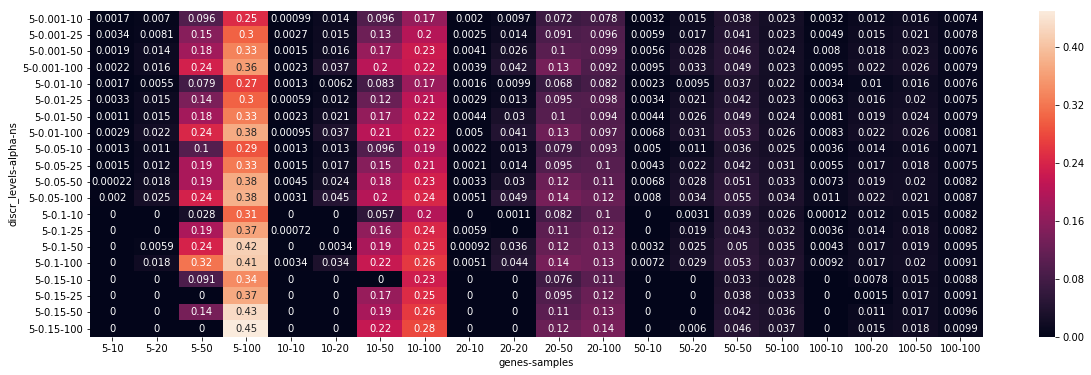

In [8]:
params = ["discr_levels","alpha","ns"]
plot_file = img_outdir+"/" + tool_suffix+".J_rel.heatmap.svg"
heatmap_outfile =  tsv_outdir+ tool_suffix+".J_rel.heatmap.tsv"

heatmap = plot_performance_heatmap(results,params,top=20,
                          g_sizes = [5,10,20,50,100], s_sizes = [10,20,50,100],
                          plot=True,plot_file=plot_file,outfile=heatmap_outfile)

In [9]:
parameters

(('discr_levels', [2, 3, 5, 10, 15, 20, 30, 40, 50]),
 ('alpha', [0.001, 0.01, 0.05, 0.1, 0.15]),
 ('ns', [5, 10, 25, 50, 100]))

In [10]:
default_params = (5,0.05, 10)

In [12]:

r = get_opt_params(results, params, default_params=default_params, more_n_smaples = 0)

All 45000 runs considered

with Optimal parameters (Relevance --> max):
	discr_levels=5;
	alpha=0.1;
	ns=100;
	Max. avg. Relevance: 0.088 ± 0.119
	Max. avg. Recovery: 0.08 ± 0.114
	Max. avg. n_biclusters: 9.06 ± 2.491
With Default parameters:
	discr_levels=5;
	alpha=0.05;
	ns=10;
	avg. Relevance: 0.051 ± 0.075
	avg. Recovery: 0.046 ± 0.07
	avg. n_biclusters: 10.0 ± 0.0
